In [28]:
import torch
import torchvision

In [29]:
from torchvision import transforms as T

In [30]:
from PIL import Image
import cv2
import numpy
import matplotlib.pyplot as plt
from torchvision.models.detection import FasterRCNN_MobileNet_V3_Large_320_FPN_Weights

In [31]:
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT)

In [32]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(320,), max_size=640, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block): 

In [33]:
img_file = '/Users/aisaiahpellecer/Desktop/lclabs-jfp24/early_work/images/image_1.jpg'
ig = Image.open(img_file)

In [34]:
transform = T.ToTensor()
img = transform(ig)

In [35]:
with torch.no_grad():
    pred = model([img])

In [36]:
# pred

In [37]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [38]:
pred[0]['labels']

tensor([88,  1, 88,  1, 88, 88, 88, 88, 88, 88,  8,  1,  1, 88, 88,  1, 88,  1,
         1, 88, 88, 88,  1,  1,  1, 88,  1, 19, 88, 88,  9,  1, 88,  1, 22,  1,
         1,  1,  1,  1, 88,  1,  1, 88,  1,  1,  1])

In [39]:
pred[0]['scores']

tensor([0.9080, 0.8830, 0.6382, 0.6234, 0.4318, 0.4212, 0.3377, 0.2648, 0.2527,
        0.2034, 0.2027, 0.1993, 0.1980, 0.1910, 0.1883, 0.1719, 0.1699, 0.1664,
        0.1632, 0.1601, 0.1409, 0.1398, 0.1328, 0.1312, 0.1225, 0.1182, 0.1154,
        0.1113, 0.1051, 0.1011, 0.0991, 0.0967, 0.0933, 0.0922, 0.0913, 0.0881,
        0.0879, 0.0878, 0.0848, 0.0831, 0.0811, 0.0746, 0.0737, 0.0645, 0.0608,
        0.0597, 0.0593])

In [40]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [41]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

print(len(coco_names))

91


In [42]:
detected = list(set([coco_names[x - 1] for x in pred[0]['labels']]))
print(detected)


['horse', 'elephant', 'boat', 'teddy bear', 'truck', 'person']


In [43]:
threshold = 0.6
# scores >= threshold
torch.argwhere(scores>threshold)
# which basically means that at these positions, the prediction for the objects is greater or equal to the threshold.

tensor([[0],
        [1],
        [2],
        [3]])

In [44]:
num = torch.argwhere(scores>threshold).shape[0]
print(num)

4


In [45]:
igg = cv2.imread(img_file)

In [46]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [47]:
for i in range(num):
    x1, x2, y1, y2 = bboxes[i].numpy().astype("int")
    # print(x1, x2, y1, y2)
    class_name = coco_names[labels.numpy()[i] - 1]
    # print(class_name)
    igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 225, 0), 1)
    igg = cv2.putText(igg, class_name, (x1, y1 - 10), font, 0.9, (225,0,0),1,cv2.LINE_AA)

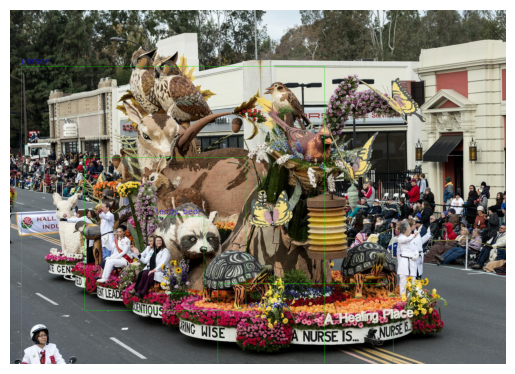

In [48]:
plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [49]:
def object_detection(image_path,threshold=0.80):
    ig = Image.open(image_path)
    #transforms the image into a tensor
    transform = T.ToTensor()
    img = transform(ig)

    #Model Prediction
    with torch.no_grad():
        pred = model([img])

    scores =  pred[0]["scores"]

    #Selects the Predictions with scores greater than or equal to the threshold
    num = torch.argwhere(scores>=threshold).shape[0]

    if num == 0:
        print(f'No objects within the scope of the threshold: {threshold} and COCO dataset detected')
        igg = cv2.imread(image_path)
        plt.figure(figsize=(8, 8), dpi=100) 
        plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    else:
        # create dictionary of prediction labels and bounding boxes
        bboxes, labels = pred[0]["boxes"], pred[0]["labels"]

        igg = cv2.imread(image_path)
        font = cv2.FONT_HERSHEY_SIMPLEX


        # Print the name of Objects detected in the image: 
        detection = list(set(coco_names[labels.numpy()[i] - 1] for i in range(num)))

        print(f'At threshold: {threshold} model detected: {detection}')


        #Labels prediction with bounding box and class name from the COCO dataset
        for i in range(num):
            x1, x2, y1, y2 = bboxes[i].numpy().astype("int")
            # print(x1, x2, y1, y2)
            class_name = coco_names[labels.numpy()[i] - 1]
            val = scores[i].numpy().astype("float").round(2)
            # print(class_name)
            igg = cv2.rectangle(igg, (x1, y1), (x2, y2),(57,255,20), 2)
            igg = cv2.putText(igg, f'{class_name}: {val}', (x1, y1 - 10), font, 1, (57,255,20),2,cv2.LINE_AA)

        #plots the image
        plt.figure(figsize=(8, 8), dpi=100) 
        plt.imshow(cv2.cvtColor(igg, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

No objects within the scope of the threshold: 0.8 and COCO dataset detected


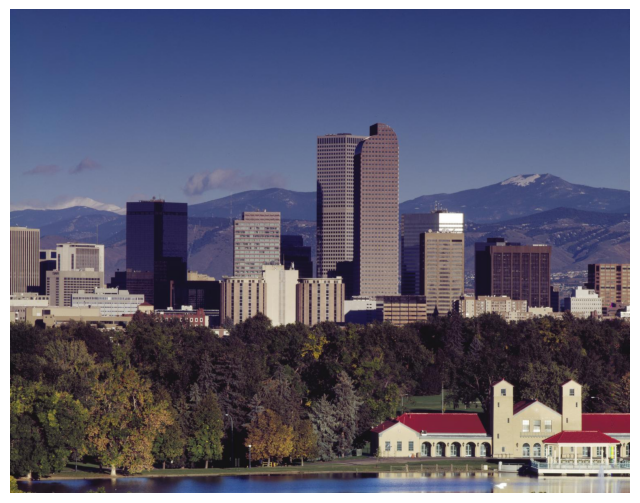

In [50]:
object_detection('images/image_42.jpg')

At threshold: 0.8 model detected: ['person']


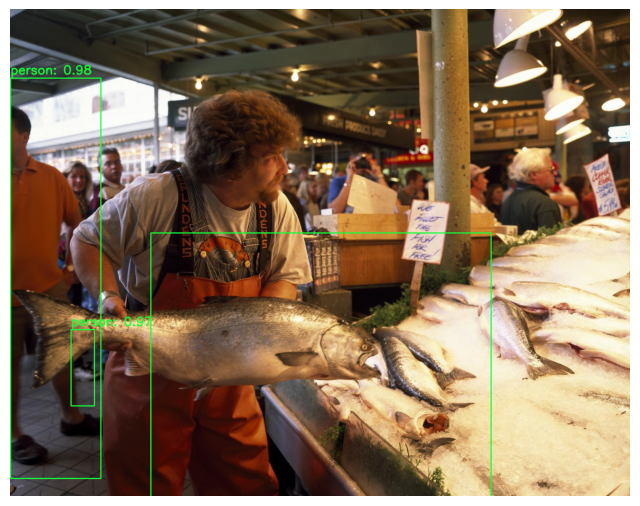

In [51]:
object_detection('images/image_28.jpg')

No objects within the scope of the threshold: 0.8 and COCO dataset detected


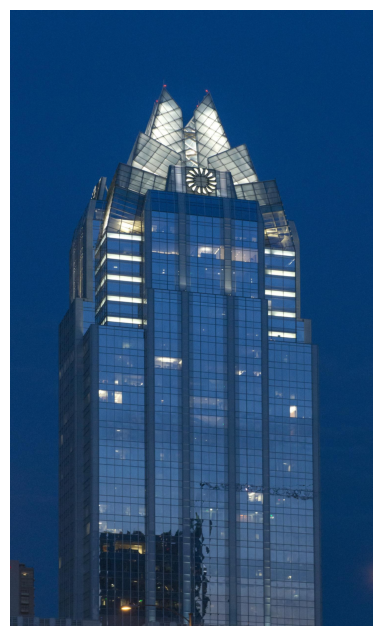

In [52]:
object_detection('images/image_44.jpg')

No objects within the scope of the threshold: 0.8 and COCO dataset detected


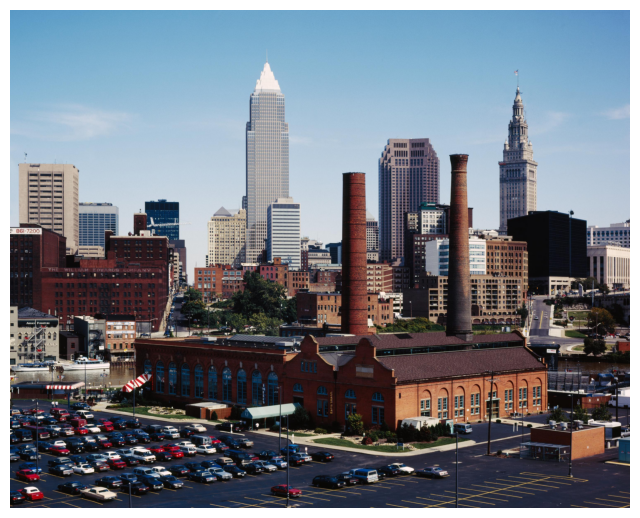

In [53]:
object_detection('images/image_40.jpg')

No objects within the scope of the threshold: 0.5 and COCO dataset detected


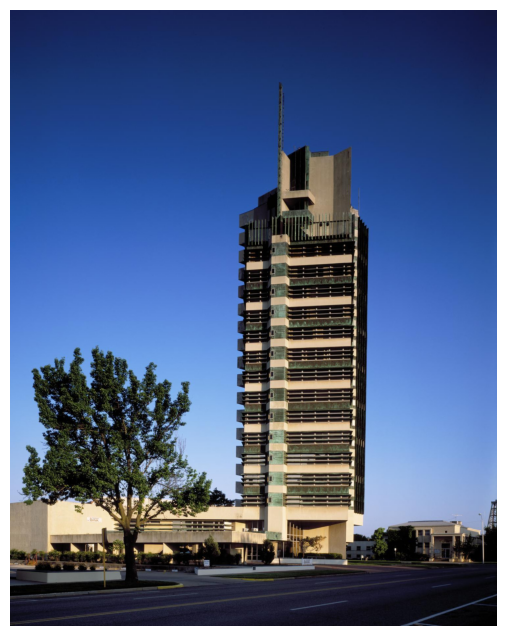

In [54]:
object_detection('images/image_35.jpg',0.5)

No objects within the scope of the threshold: 0.7 and COCO dataset detected


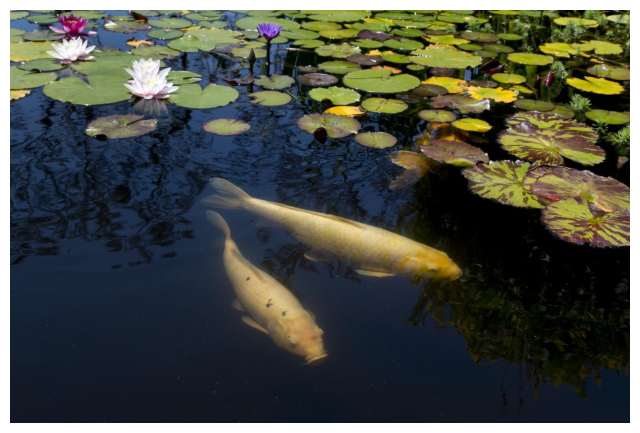

In [55]:
object_detection('images/image_30.jpg',0.7)